In [2]:
import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from pyproj import Proj,transform

def fixRegion(df):
    reg = df.NHDPlusReg
    
    if reg[:2] == '03':
        reg = '03'
        
    if reg[:2] == '10':
        reg = '10'
    
    return reg

In [4]:
gages = pd.read_csv('./data/CATCHMENT_v1.csv')
gages.loc[gages.Lat_snap == -9999,'Lat_snap'] = np.NaN
gages.loc[gages.Long_snap == -9999,'Long_snap'] = np.NaN
gages.dropna(inplace=True)
gages.NHDPlusReg = gages.apply(fixRegion, axis = 1)

In [5]:
inProj = '+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs' # projection of points pulled from shapefile
outProj = '+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

inProj = Proj(inProj, preserve_units=True)
outProj = Proj(outProj, preserve_units=True)

In [6]:
xs = []
ys = []

for lon,lat in zip(gages.Long_snap,gages.Lat_snap):
    x,y = transform(inProj,outProj,lon,lat)
    xs.append(x)
    ys.append(y)

In [7]:
gages['x'] = xs
gages['y'] = ys

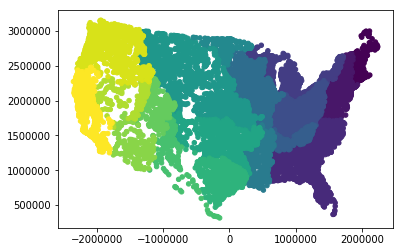

In [11]:
plt.scatter(gages.x,gages.y,s=20,c=gages.NHDPlusReg)

In [12]:
gages.NHDPlusReg.unique()

array(['01', '02', '04', '05', '07', '09', '03', '06', '08', '10', '11',
       '12', '13', '14', '15', '16', '17', '18'], dtype=object)

In [13]:
gages.head()

,FID,Gage_no,Gage_name,Gage_type,Lat_nwis,Long_nwis,Area_nwis,Lat_snap,Long_snap,COMID,...,CHECKED,QC_notes1,REVIEWED,Rev_notes2,Ver_notes3,Gage_info,DropReason,QC_final,x,y
0,0,1098530,"SUDBURY RIVER AT SAXONVILLE, MA",ContGage,42.325373,-71.397560,274.538739,42.325326,-71.397449,6772927,...,,,,,,,,,1.992113e+06,2.406610e+06
1,1,1122680,"MERRICK BK NR SCOTLAND, CT.",CrestStage,41.728988,-72.085076,13.493838,41.728987,-72.084926,6162963,...,,,,,,,,,1.954254e+06,2.327791e+06
2,2,1176000,"QUABOAG RIVER AT WEST BRIMFIELD, MA",ContGage,42.182316,-72.263691,388.498215,42.182412,-72.263445,7690649,...,,,,,,,,,1.927434e+06,2.373283e+06
3,3,1173500,"WARE RIVER AT GIBBS CROSSING, MA",ContGage,42.236204,-72.272580,510.227656,42.236129,-72.272568,7690465,...,,,,,,,,,1.925224e+06,2.378919e+06
4,4,1127500,"YANTIC RIVER AT YANTIC, CT",ContGage,41.558709,-72.121467,231.285937,41.558570,-72.121492,6168318,...,"JAF, 12/21/2015",OK.,"GCB, 3/24/2017","Yes agree with move, location of streamgage is...",,,,OK,1.956071e+06,2.308568e+06


In [30]:
for reg in gages.NHDPlusReg.unique():
    tmp = gages.loc[gages.NHDPlusReg == reg].copy()
    tmp['ID'] = np.arange(1,len(tmp)+1)
    tmp.to_csv('./data/CATCHMENT_region_%s.csv'%reg,index=False,float_format='%.6f')

In [15]:
reg05 = pd.read_csv('./data/CATCHMENT_region_05.csv')

In [18]:
len(reg05.columns)

25

In [19]:
reg05.columns

Index(['FID', 'Gage_no', 'Gage_name', 'Gage_type', 'Lat_nwis', 'Long_nwis',
       'Area_nwis', 'Lat_snap', 'Long_snap', 'COMID', 'COMID_meas',
       'REACHCODE', 'REACH_meas', 'NHDPlusReg', 'State', 'CHECKED',
       'QC_notes1', 'REVIEWED', 'Rev_notes2', 'Ver_notes3', 'Gage_info',
       'DropReason', 'QC_final', 'x', 'y'],
      dtype='object')

In [24]:
tmp = gages.loc[gages.NHDPlusReg == '14']

In [28]:
tmp.Gage_no.unique()

array([        9171100,         9186500,         9357230,         9177500,
               9307500,         9166500,         9078500,         9350700,
               9270000,         9073400,         9362000,         9147500,
               9345200,         9312500,         9261700,         9366000,
               9270500,         9109000,         9312600,         9273000,
               9346200,         9292000,         9340000,         9119000,
               9349800,         9358550,         9182400,         9361000,
               9277501,         9275500,         9378630,         9355700,
               9332100,         9358000,         9339900,         9350800,
               9313500,         9379200,         9367500,         9280400,
               9124500,         9110000,         9294500,         9343000,
               9174600,         9353500,         9177000,         9268900,
               9354500,         9288000,         9277800,         9378170,
               9180500,  